<a href="https://colab.research.google.com/github/camyllalima/PDI-Exercicios/blob/main/PDI_Lista2_Q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Instalando scikit
!pip install -U scikit-image

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


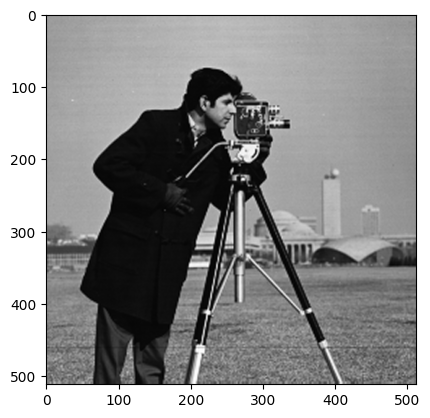

In [42]:
# Carrega a imagem do cameraman
cameraman_path = '/content/drive/MyDrive/Lista2_imagens/cameraman.png'

# Carrega a imagem em escala de cinza
image = cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, 'gray')

In [47]:
# Define os valores de desvio padrão para os filtros Gaussianos
sigmas = [1, 3, 5]

# Aplica o filtro Gaussiano com diferentes valores de sigma
blurred_images = [cv2.GaussianBlur(image, (0, 0), sigmaX=s, sigmaY=s) for s in sigmas]

# Aplica o detector de bordas de Canny com os mesmos parâmetros para todas
canny_edges = [cv2.Canny(img, 100, 200) for img in blurred_images]

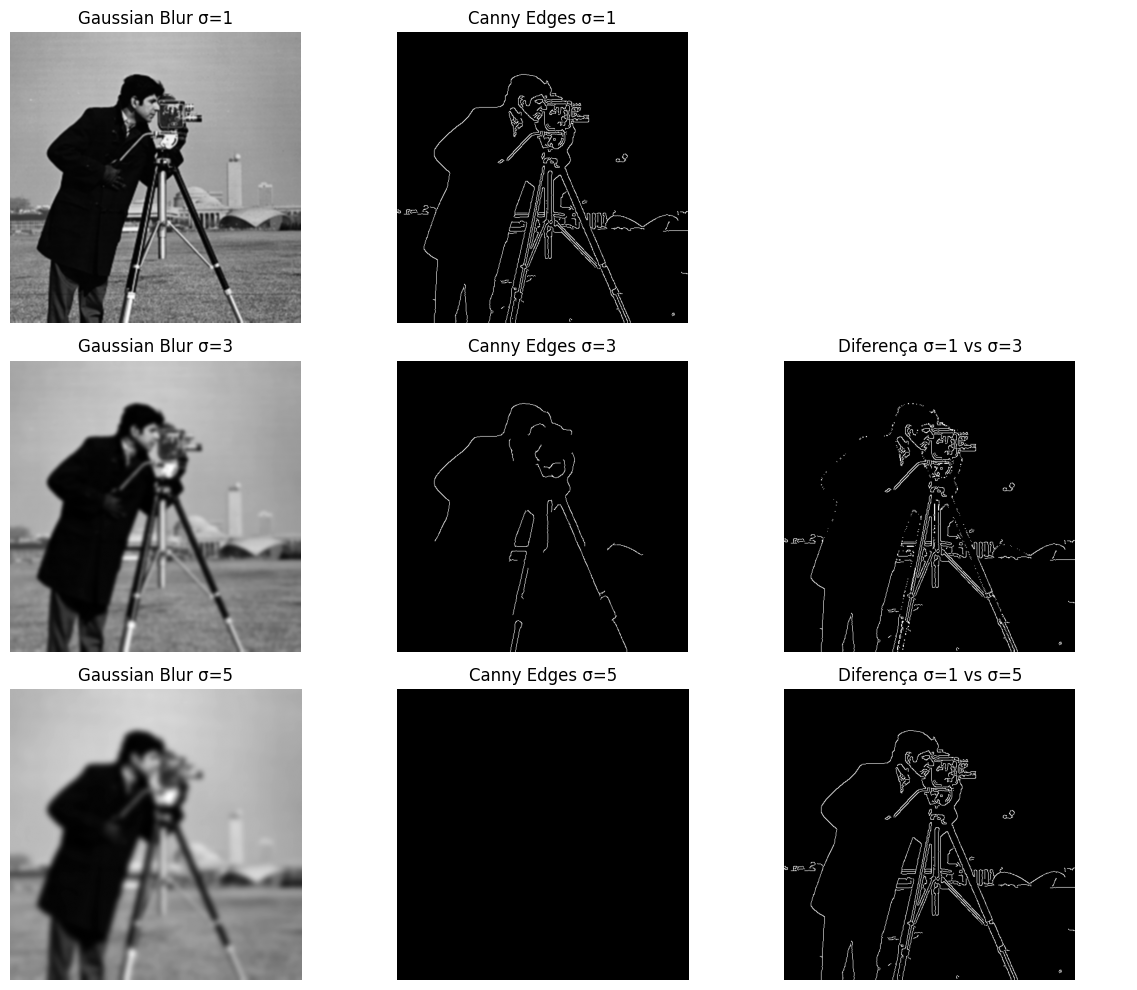

In [48]:
# Mostra os resultados
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, sigma in enumerate(sigmas):
    # Imagem suavizada
    axes[i][0].imshow(blurred_images[i], cmap='gray')
    axes[i][0].set_title(f'Gaussian Blur σ={sigma}')
    axes[i][0].axis('off')

    # Bordas detectadas
    axes[i][1].imshow(canny_edges[i], cmap='gray')
    axes[i][1].set_title(f'Canny Edges σ={sigma}')
    axes[i][1].axis('off')

    # Diferença entre bordas de σ=1 e a atual (para σ > 1)
    if i > 0:
        diff = cv2.absdiff(canny_edges[0], canny_edges[i])
        axes[i][2].imshow(diff, cmap='gray')
        axes[i][2].set_title(f'Diferença σ=1 vs σ={sigma}')
        axes[i][2].axis('off')
    else:
        axes[i][2].axis('off')

plt.tight_layout()
plt.show()


---

* **σ = 1** (baixa escala):

  * As bordas finas e os detalhes mais sutis da imagem são preservados.
  * Muitas arestas pequenas e texturas são detectadas.

* **σ = 3** (escala intermediária):

  * Detalhes finos desaparecerem.
  * Apenas bordas estruturais maiores e bem definidas são detectadas.

* **σ = 5** (alta escala):

  * A imagem fica significativamente embaçada.
  * Nenhuma borda é detectada.

* **Diferenças**:

  * As colunas de diferença (`σ=1 vs σ=3`, `σ=1 vs σ=5`) mostram exatamente **quais bordas foram perdidas** com o aumento da escala.
  * Isso reforça o princípio da teoria escala-espaço: **bordas em diferentes escalas representam diferentes informações estruturais da imagem**.